# Imports

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sp
from scipy.stats import norm
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import mne

def sine_func(fs, freq, amp, time, phase=0):
    samples = fs * time
    t = np.arange(samples)
    voltage = amp * np.sin(2 * np.pi * freq * t / fs + phase)
    return t, voltage

# testing old COGS280 data

In [65]:
# Whole time series -- 30390 time points
raw_EO = mne.io.read_raw_eeglab(r'C:\Users\Jake\testing-learning2024\Data\MichaelEOxdf.set', verbose = False)

channels = getattr(raw_EO, "ch_names")
n_channels = len(channels)
tau = 10
time_points = len(raw_EO)
print(time_points)
Forw = np.zeros((n_channels, n_channels))
Rev = np.zeros((n_channels, n_channels))

forw_data = raw_EO.get_data()
rev_data = np.flip(forw_data, 1)

for i in range(n_channels):
    for j in range(n_channels):
      x = pearsonr(forw_data[i,0:time_points-tau], forw_data[j,tau:time_points])
      y = pearsonr(rev_data[i,0:time_points-tau], rev_data[j,tau:time_points])
      Forw[i,j] = x[0]
      Rev[i,j] = y[0]
Forw = -1/2 * np.log(1 - (Forw**2))
Rev = -1/2 * np.log(1 - (Rev**2))
ref_matrix = (Forw - Rev)**2
irrev = np.mean(ref_matrix)
stationarity = np.std(ref_matrix)
print("EO irrev: " + str(irrev))


C:\Users\Jake\AppData\Local\Temp\ipykernel_10008\958065488.py:2: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw_EO = mne.io.read_raw_eeglab(r'C:\Users\Jake\testing-learning2024\Data\MichaelEOxdf.set', verbose = False)


30390
EO irrev: 0.00010317023632115136


## Autocorrelation function testing

C:\Users\Jake\AppData\Local\Temp\ipykernel_10008\718871611.py:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  data = mne.io.read_raw_eeglab(r'C:\Users\Jake\testing-learning2024\Data\MichaelEOxdf.set', verbose = False)


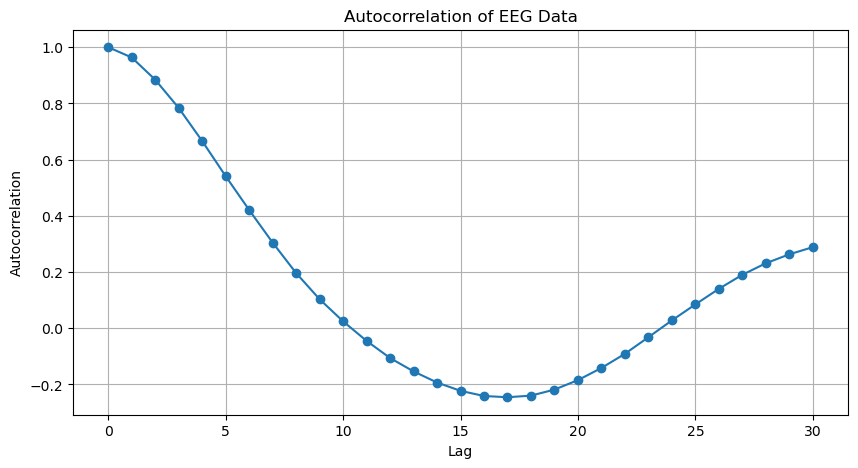

In [66]:
data = mne.io.read_raw_eeglab(r'C:\Users\Jake\testing-learning2024\Data\MichaelEOxdf.set', verbose = False)
data = data.get_data()

def autocorrelation(x, max_lag):
    """ Compute autocorrelation using NumPy for a given max_lag """
    autocorr = np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
    autocorr = autocorr[autocorr.size // 2:]  # Take the second half
    autocorr /= autocorr[0]  # Normalize
    return autocorr[:max_lag+1]

max_lag = 30  # Adjust based on your data and needs
autocorr_values = autocorrelation(data[4,:], max_lag)

plt.figure(figsize=(10, 5))
plt.plot(autocorr_values, linestyle='-', marker='o')
plt.title('Autocorrelation of EEG Data')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

# simulating 5 electrodes

### autocorr function

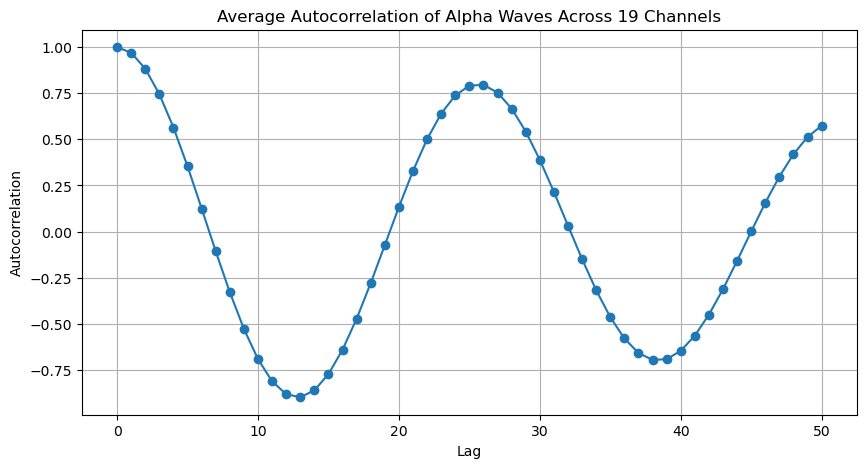

In [67]:
fs = 256
timepoints = 128

freq = 10  # in Hz
amp = 7  # in arbitrary units (au)
duration = timepoints / fs  # in seconds
phase_increment = np.pi / 5  # Phase increment for each channel

n_channels = 5

all_alpha = np.zeros((n_channels, timepoints))

for i in range(n_channels):
    _, sine = sine_func(fs, freq, amp, duration, phase=0)
    sine = sine + 10  # add a DC offset
    all_alpha[i, :] = sine

time = np.linspace(0, timepoints / fs, timepoints)

### AUTOCORRELATION
def autocorrelation(x, max_lag):
    """ Compute autocorrelation using NumPy for a given max_lag """
    autocorr = np.correlate(x - np.mean(x), x - np.mean(x), mode='full')
    autocorr = autocorr[autocorr.size // 2:]  # Take the second half
    autocorr /= autocorr[0]  # Normalize
    return autocorr[:max_lag + 1]

max_lag = 50

autocorrs = np.array([autocorrelation(channel, max_lag) for channel in all_alpha])
mean_autocorr = np.mean(autocorrs, axis=0)

# Plot the average autocorrelation function
plt.figure(figsize=(10, 5))
plt.plot(mean_autocorr, marker='o', linestyle='-')
plt.title('Average Autocorrelation of Alpha Waves Across 19 Channels')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()
#######

### no phase lag

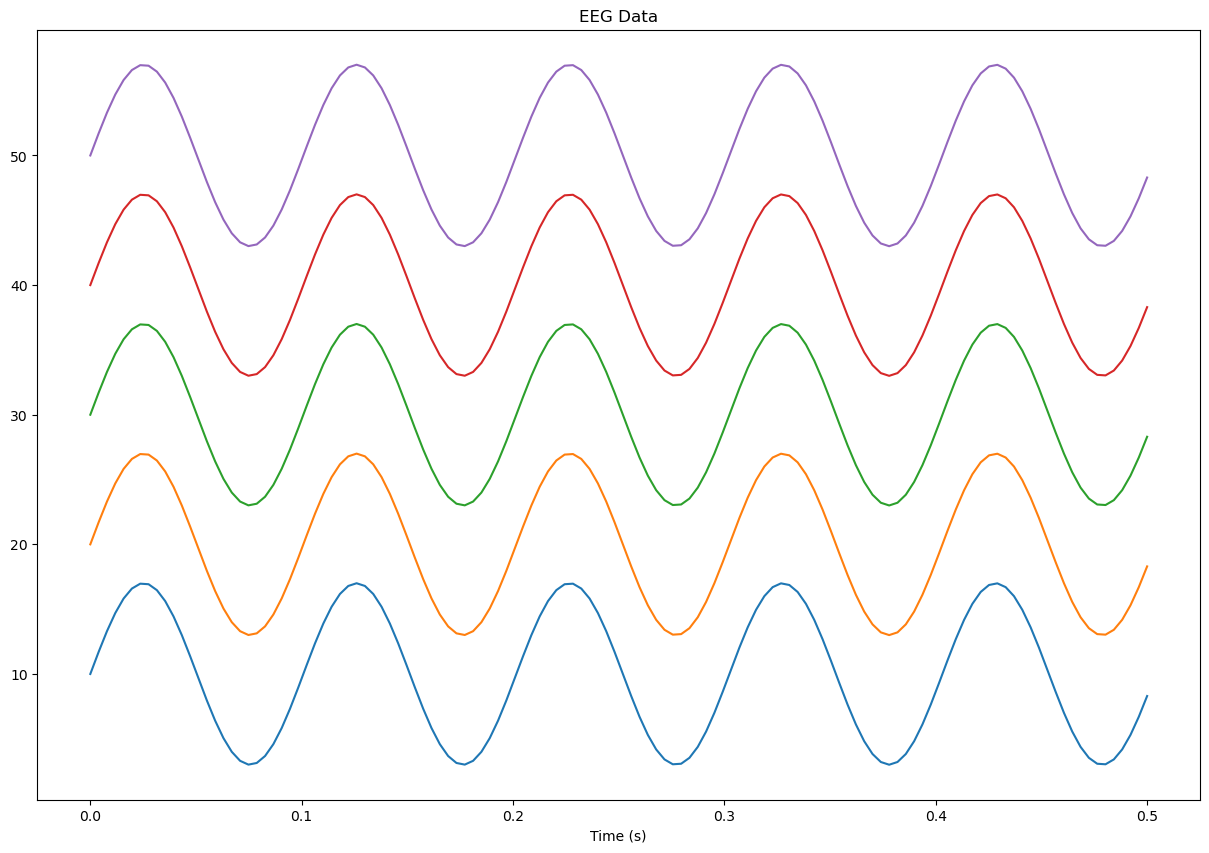

Irrev-- perfect zero phase lag alpha no noise!: 0.0
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [68]:
fs = 256
timepoints = 128

freq = 10  # in Hz
amp = 7  # in arbitrary units (au)
duration = timepoints / fs  # in seconds
phase_increment = np.pi / 5  # Phase increment for each channel

n_channels = 5

all_alpha = np.zeros((n_channels, timepoints))

for i in range(n_channels):
    _, sine = sine_func(fs, freq, amp, duration, phase=0)
    sine = sine + 10  # add a DC offset
    all_alpha[i, :] = sine

time = np.linspace(0, timepoints / fs, timepoints)

# Plotting
plt.figure(figsize=(15, 10))
plots = []
labels = []

for i in range(n_channels):
    plot_handle, = plt.plot(time, all_alpha[i] + i * 10, label=f'Electrode {n_channels-i}')
    plots.append(plot_handle)
    labels.append(f'Electrode {n_channels-i}')  # Reverse order of labels

# Reverse the plot handles and labels for the legend
#plt.legend(plots[::-1], labels[::-1], markerfirst=False)

plt.xlabel('Time (s)')
plt.title('EEG Data')
plt.show()



tau = 8

Forw = np.zeros((n_channels, n_channels))
Rev = np.zeros((n_channels, n_channels))

forw_data = all_alpha
rev_data = np.flip(forw_data, 1)

for i in range(n_channels):
    for j in range(n_channels):
      x = pearsonr(forw_data[i,0:timepoints-tau], forw_data[j,tau:timepoints])
      y = pearsonr(rev_data[i,0:timepoints-tau], rev_data[j,tau:timepoints])
      Forw[i,j] = x[0]
      Rev[i,j] = y[0]
Forw = -1/2 * np.log(1 - (Forw**2))
Rev = -1/2 * np.log(1 - (Rev**2))
ref_matrix = ((Forw - Rev)**2)
irrev = np.mean(ref_matrix)
print("Irrev-- perfect zero phase lag alpha no noise!: " + str(irrev))
print(ref_matrix)

### phase increment

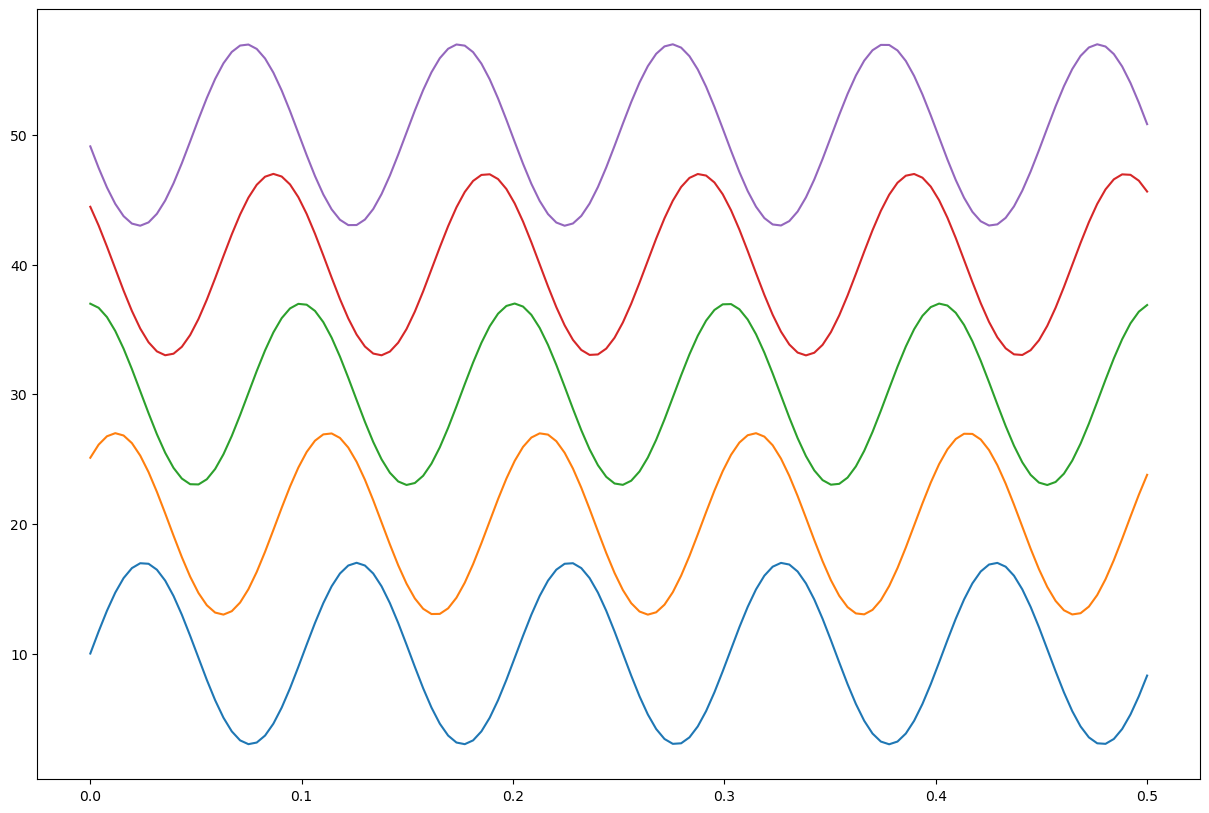

Irrev-- linear phase increment alpha without noise!: 0.3068502847588564
[[0.00000000e+00 7.06445880e-01 1.18428366e-01 4.01774549e-01
  9.62714251e-03]
 [7.06445880e-01 3.90000814e-33 6.01795511e-01 1.73841012e-01
  4.10368470e-01]
 [1.18428366e-01 6.01795511e-01 0.00000000e+00 5.89355796e-01
  1.28835849e-01]
 [4.01774549e-01 1.73841012e-01 5.89355796e-01 0.00000000e+00
  6.95155984e-01]
 [9.62714251e-03 4.10368470e-01 1.28835849e-01 6.95155984e-01
  0.00000000e+00]]
ref_matrix values with corresponding electrode pairs:
ref_matrix[1, 1] = 0.0
ref_matrix[1, 2] = 0.7064458803239742
ref_matrix[1, 3] = 0.11842836583720026
ref_matrix[1, 4] = 0.4017745492165983
ref_matrix[1, 5] = 0.009627142510675046
ref_matrix[2, 1] = 0.7064458803239732
ref_matrix[2, 2] = 3.9000081373841526e-33
ref_matrix[2, 3] = 0.6017955110353173
ref_matrix[2, 4] = 0.17384101226434928
ref_matrix[2, 5] = 0.41036846981141206
ref_matrix[3, 1] = 0.11842836583720072
ref_matrix[3, 2] = 0.6017955110353195
ref_matrix[3, 3] = 0.0

<Figure size 640x480 with 0 Axes>

In [71]:
from matplotlib import rcParams

# Ensure text is stored as editable text, not paths
rcParams['svg.fonttype'] = 'none'

fs = 256
timepoints = 128

freq = 10  # in Hz
amp = 7  # in arbitrary units (au)
duration = timepoints / fs  # in seconds
phase_increment = np.pi / n_channels  # Phase increment for each channel

n_channels = 5

all_alpha = np.zeros((n_channels, timepoints))

for i in range(n_channels):
    _, sine = sine_func(fs, freq, amp, duration, phase=(i * (phase_increment*1.3)))
    sine = sine + 10  # add a DC offset
    all_alpha[i, :] = sine

time = np.linspace(0, timepoints / fs, timepoints)

# Plotting
plt.figure(figsize=(15, 10))
plots = []
labels = []

for i in range(n_channels):
    plot_handle, = plt.plot(time, all_alpha[i] + i * 10, label=f'Electrode {n_channels-i}')
    plots.append(plot_handle)
    labels.append(f'Electrode {n_channels-i}')  # Reverse order of labels

# Reverse the plot handles and labels for the legend
#plt.legend(plots[::-1], labels[::-1], markerfirst=False)

#plt.xlabel('Time (s)')
#plt.title('EEG Data')
plt.show()

tau = 5

Forw = np.zeros((n_channels, n_channels))
Rev = np.zeros((n_channels, n_channels))

forw_data = all_alpha
rev_data = np.flip(forw_data, 1)

for i in range(n_channels):
    for j in range(n_channels):
        x = pearsonr(forw_data[i, 0:timepoints-tau], forw_data[j, tau:timepoints])
        y = pearsonr(rev_data[i, 0:timepoints-tau], rev_data[j, tau:timepoints])
        Forw[i, j] = x[0]
        Rev[i, j] = y[0]
# Calculate the irreversible metrics
Forw = -1/2 * np.log(1 - (Forw**2))
Rev = -1/2 * np.log(1 - (Rev**2))
ref_matrix = ((Forw - Rev)**2)
irrev = np.mean(ref_matrix)

# Print the ref_matrix with electrode pairs
print("Irrev-- linear phase increment alpha without noise!: " + str(irrev))
print(ref_matrix)
print("ref_matrix values with corresponding electrode pairs:")
for i in range(n_channels):
    for j in range(n_channels):
        print(f"ref_matrix[{i+1}, {j+1}] = {ref_matrix[i, j]}")

### testing svg download

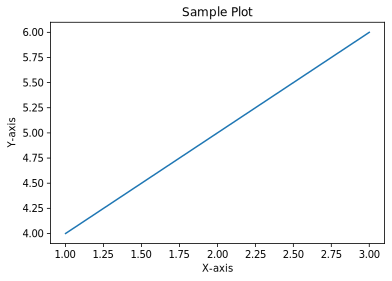

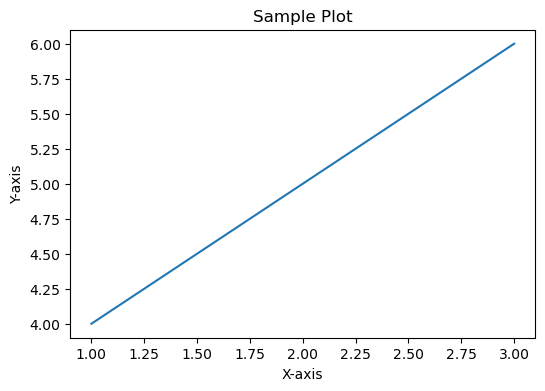

In [80]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Ensure text is stored as editable text, not paths
rcParams['svg.fonttype'] = 'none'

# Create a figure and axis using the object-oriented approach
fig, ax = plt.subplots(figsize=(6, 4))

# Create a simple plot
ax.plot([1, 2, 3], [4, 5, 6])
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Sample Plot')

# Force the figure to render
fig.canvas.draw()

# Save the plot as an SVG file with editable text
fig.savefig("figure_editable.svg", format="svg", bbox_inches='tight', transparent=True)

# Display the saved SVG in the notebook
from IPython.display import SVG, display
display(SVG(filename='figure_editable.svg'))



# new